In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from Environment import Environment
from Agent import Agent
from LinearRegression import LinearRegression
from TicTacToe import TicTacToe
import pickle

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [18]:
model = LinearRegression(7)
f_plot = []
for game in tqdm(range(10000)):
    env = Environment()
    ag1 = Agent('x', model)
    ag2 = Agent('o', model)
    agents = [ag1, ag2]
    features = [[], []]
    turn = 0
    while True:
        curr_board = env.get_state()
        
        action, feature = agents[turn].predict_action(curr_board)
        features[turn].append(feature)
        env.make_action(action)
        stat = env.finish()
        turn = 1 - turn
        if stat > 0:
            break
        
        if game > 9996:
            print(env.get_state())

    if stat == 1:
        data = np.stack(features[0] + features[1])
        labels = np.zeros((len(data), 1))
    else:
        winner = stat % 2
        data = np.stack(features[winner] + features[1-winner])
        labels = np.concatenate([np.ones((len(features[winner]), 1))*100,np.ones((len(features[1-winner]), 1))*-100], axis = 0)

    ind = np.arange(len(data))
    np.random.shuffle(ind)
    data = data[ind]
    labels = labels[ind]

    model.fit(data, labels)
    f_plot.append(model.params.flatten())

f_plot = np.stack(f_plot)

  0%|          | 0/10000 [00:00<?, ?it/s]

[['x' 'e' 'e']
 ['e' 'e' 'e']
 ['e' 'e' 'e']]
[['x' 'e' 'o']
 ['e' 'e' 'e']
 ['e' 'e' 'e']]
[['x' 'e' 'o']
 ['e' 'e' 'e']
 ['e' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['e' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['x' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['x' 'x' 'o']]
[['x' 'e' 'o']
 ['o' 'e' 'x']
 ['x' 'x' 'o']]
[['x' 'e' 'o']
 ['o' 'o' 'x']
 ['x' 'x' 'o']]
[['x' 'e' 'e']
 ['e' 'e' 'e']
 ['e' 'e' 'e']]
[['x' 'e' 'o']
 ['e' 'e' 'e']
 ['e' 'e' 'e']]
[['x' 'e' 'o']
 ['e' 'e' 'e']
 ['e' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['e' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['x' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['x' 'x' 'o']]
[['x' 'e' 'o']
 ['o' 'e' 'x']
 ['x' 'x' 'o']]
[['x' 'e' 'o']
 ['o' 'o' 'x']
 ['x' 'x' 'o']]
[['x' 'e' 'e']
 ['e' 'e' 'e']
 ['e' 'e' 'e']]
[['x' 'e' 'o']
 ['e' 'e' 'e']
 ['e' 'e' 'e']]
[['x' 'e' 'o']
 ['e' 'e' 'e']
 ['e' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['e' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['x' 'x' 'e']]
[['x' 'e' 'o']
 ['o' 'e' 'e']
 ['x

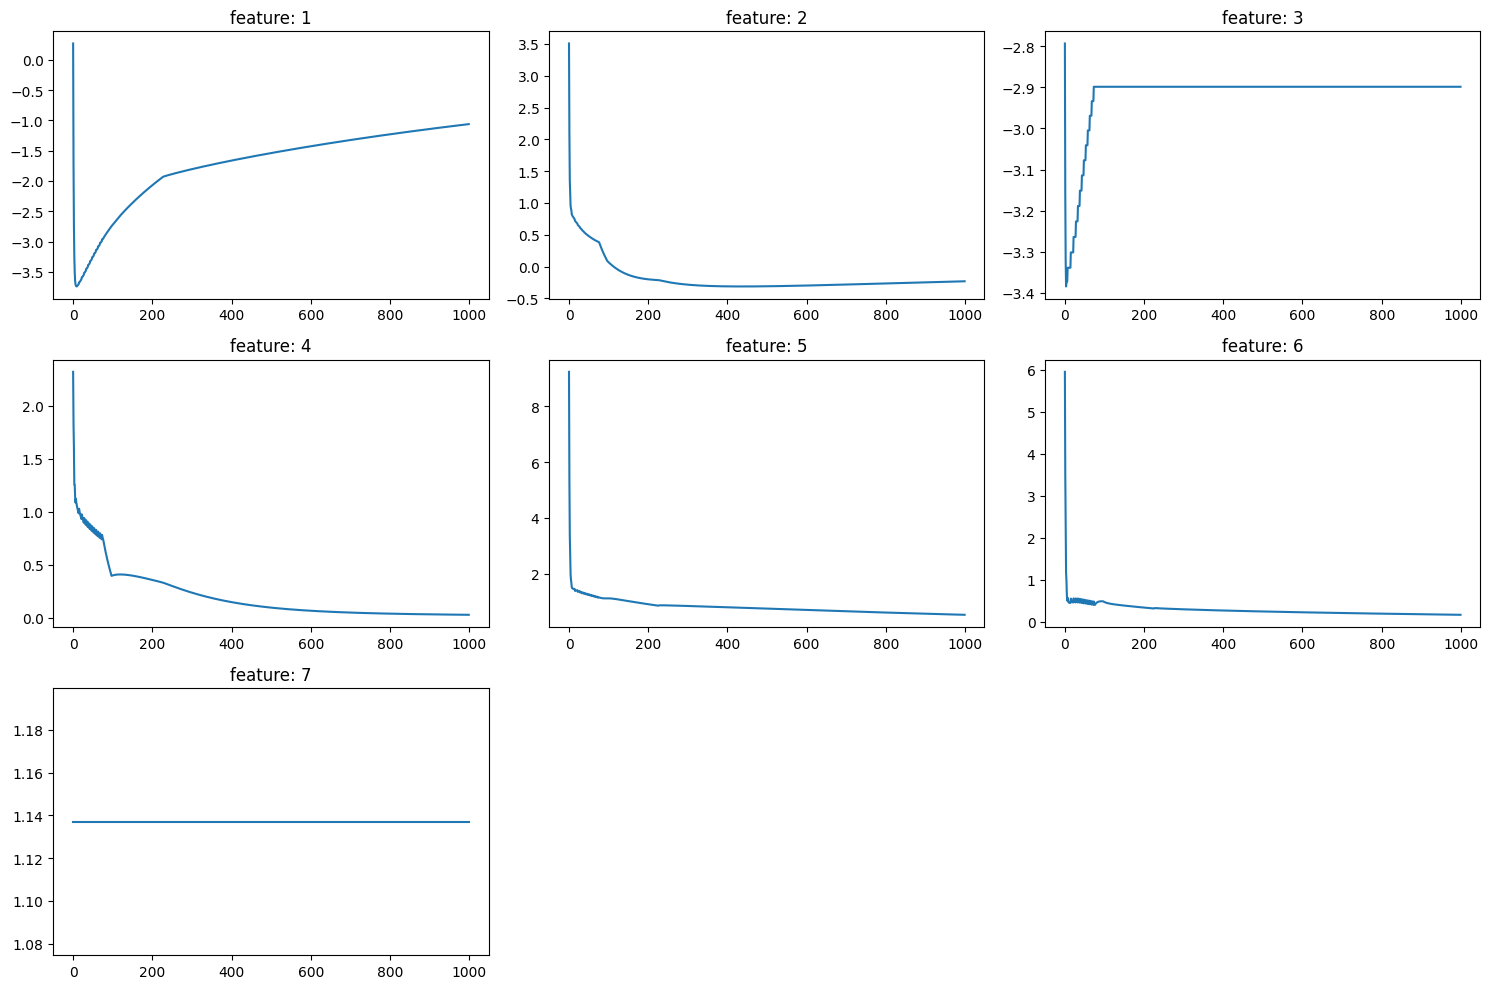

In [16]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for i in range(f_plot.shape[1]):
    axes[i].plot(f_plot[:,i])  
    axes[i].set_title(f"feature: {i+1}")
for i in range(f_plot.shape[1], num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model.params, file)